In [81]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd
import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data Reading and Understanding

In [82]:
retail = pd.read_csv("input/Online Retail.csv")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Data Inspection

In [83]:
retail.shape

(406829, 9)

In [84]:
retail.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [85]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Revenue      406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.9+ MB


In [86]:
# parse date
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [87]:
retail.isnull().values.any()

np.False_

In [88]:
retail.isnull().sum()*100/retail.shape[0]


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
Revenue        0.0
dtype: float64

# RFM

## Extracting R (Recency), F (Frequency), M (Monetary) columns form the data.

In [89]:
#RFM implementation

# Extracting amount by multiplying quantity and unit price and saving the data into amount variable.
retail["Amount"]  = retail.Quantity * retail.UnitPrice

## Monetary Value

In [90]:
# Monetary Function

# Finding total amount spent per customer
monetary = retail.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Frequency Value

In [91]:
#Frequency function

# Getting the count of orders made by each customer based on customer ID.
frequency = retail.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


## Merging Amount and Frequency columns

In [92]:
#creating master dataset
master = monetary.merge(frequency, on = "CustomerID", how = "inner")
master.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


## Recency Value

In [93]:
# Finding max data
maximum = max(retail.InvoiceDate)
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days = 1)
retail['diff'] = maximum - retail.InvoiceDate
retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,374 days 04:24:00


In [94]:
#Dataframe merging by recency
recency = retail.groupby('CustomerID')['diff'].min()
recency = recency.dt.days
recency = recency.reset_index()
recency.head()


,CustomerID,diff
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


## RFM combined DataFrame

In [95]:
#Combining all recency, frequency and monetary parameters
RFM = master.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Amount','Frequency','Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310


In [96]:
RFM['Recency'] = pd.cut(RFM['Recency'], bins=[0, 30, 60, 90, 180, 2000], labels=[5, 4, 3, 2, 1])
RFM['Frequency'] = pd.cut(RFM['Frequency'], bins=[0, 2, 5, 10, 20, 2000], labels=[1, 2, 3, 4, 5])
RFM['Monetary'] = pd.cut(RFM['Amount'], bins=[0, 78.25, 156.5, 313, 626, 100000], labels=[1, 2, 3, 4, 5])
RFM = RFM.drop('Amount', axis=1)
RFM = RFM[RFM['Monetary'].notna()]
RFM = RFM[RFM['Frequency'].notna()]
RFM = RFM[RFM['Recency'].notna()]
RFM

,CustomerID,Frequency,Recency,Monetary
1,12347.0,5,5,5
2,12348.0,5,3,5
3,12349.0,5,5,5
4,12350.0,4,1,4
5,12352.0,5,4,5
...,...,...,...,...
4367,18280.0,3,1,3
4368,18281.0,3,1,2
4369,18282.0,4,5,3
4370,18283.0,5,5,5


In [97]:
def classify_customer(row):
  fm_score = int((row['Frequency'] + row['Monetary']) // 2)
  r_score = int(row['Recency'])
  labelling_grid = [
    ['Lost', 'Lost', 'About to Sleep', 'Promising', 'Price Sensitive'],
    ['Lost', 'Lost', 'About to Sleep', 'Recent Users', 'Recent Users'],
    ['Hibernating', 'Hibernating', 'Need Attention', 'Potential Loyalists', 'Potential Loyalists'],
    ['Hibernating', 'Hibernating', 'Loyal Customer', 'Loyal Customer', 'Champions'],
    ["Can't Lose Them", "Can't Lose Them", 'Loyal Customer', 'Loyal Customer', 'Champions']
  ]
  return labelling_grid[fm_score - 1][r_score - 1]

RFM['CustomerType'] = RFM.apply(classify_customer, axis=1)

RFM

,CustomerID,Frequency,Recency,Monetary,CustomerType
1,12347.0,5,5,5,Champions
2,12348.0,5,3,5,Loyal Customer
3,12349.0,5,5,5,Champions
4,12350.0,4,1,4,Hibernating
5,12352.0,5,4,5,Loyal Customer
...,...,...,...,...,...
4367,18280.0,3,1,3,Hibernating
4368,18281.0,3,1,2,Lost
4369,18282.0,4,5,3,Potential Loyalists
4370,18283.0,5,5,5,Champions


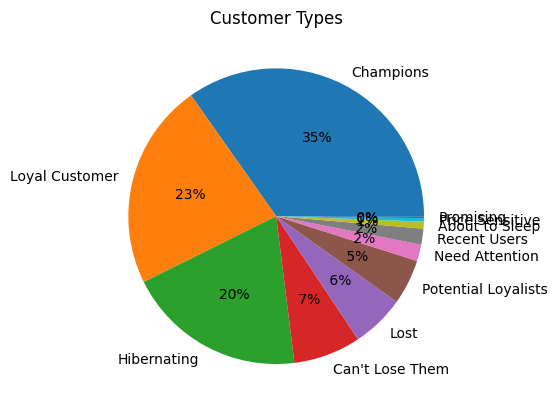

In [98]:
customer_type_counts = RFM['CustomerType'].value_counts()
customer_type_counts.plot.pie(autopct='%2.0f%%')
plt.title('Customer Types')
# remove the 'count' label
plt.ylabel('')
plt.savefig('./output/RFM_customer_types.png')

# Market Basket

## Build Transaction Dataset

In [99]:
retail['amount'] = retail.Quantity*retail.UnitPrice
AmoutSum = retail.groupby(["Description"]).amount.sum().sort_values(ascending = False)
items = list(retail.Description.unique())
grouped = retail.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)

In [100]:
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5, 
                  start_item = None, end_item = None, TopCols = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',
                               item_count.columns[1]:'item_count'}, inplace=True)
    if TopCols: 
        input_df['total_items'] = input_df[TopCols].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[TopCols], item_count[item_count.item_name.isin(TopCols)]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]
    else:
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]

In [101]:
output_df, item_counts = prune_dataset(input_df=transaction_df, length_trans=2,start_item = 0,end_item=50)
print('Number of Sales Events:', output_df.shape[0])
print('Number of Products:', output_df.shape[1])
item_counts

Number of Sales Events: 9817
Number of Products: 50


,item_name,item_count
0,WHITE HANGING HEART T-LIGHT HOLDER,2013
1,REGENCY CAKESTAND 3 TIER,1884
2,JUMBO BAG RED RETROSPOT,1643
3,PARTY BUNTING,1399
4,ASSORTED COLOUR BIRD ORNAMENT,1385
5,LUNCH BAG RED RETROSPOT,1329
6,SET OF 3 CAKE TINS PANTRY DESIGN,1218
7,POSTAGE,1194
8,LUNCH BAG BLACK SKULL.,1073
9,PACK OF 72 RETROSPOT CAKE CASES,1041


## Preprocess the data for apriori

In [102]:
products = retail['Description'].value_counts().head(50).index

retail_mba_filtered = retail[retail['Description'].isin(products)]
retail_mba = retail_mba_filtered.groupby('InvoiceNo')['Description'].apply(list)
retail_mba = retail_mba.reset_index()

max_item_count_per_invoice = retail_mba['Description'].apply(len).max()
retail_mba = retail_mba.set_index('InvoiceNo')['Description'].apply(lambda x: x + [''] * (max_item_count_per_invoice - len(x)))
retail_mba = retail_mba.apply(pd.Series)
retail_mba = retail_mba.replace([''], np.nan)

retail_mba = pd.DataFrame(retail_mba.values, columns=[f'Item {i + 1}' for i in range(max_item_count_per_invoice)])

# get rid of rows with less than 2 items
single_item_transactions = retail_mba[retail_mba.notna().sum(axis=1) < 2]
retail_mba = retail_mba[retail_mba.notna().sum(axis=1) >= 2]

In [103]:
records = []
for i in range(retail_mba.shape[0]):
  records.append([str(retail_mba.values[i, j]) for j in range(retail_mba.shape[1])])

In [104]:
from apyori import apriori

association_rules = apriori(records, min_support=0.01, min_confidence=0.5, min_lift=3, min_length=2)
association_results = list(association_rules)

In [105]:
# convert the results to a DataFrame
results = []

for item in association_results:
  pair = item[0]
  items = [x for x in pair]
  value0 = str(items[0])
  value1 = str(items[1])

  value2 = float(str(item[1]))
  value3 = float(str(item[2][0][2]))
  value4 = float(str(item[2][0][3]))

  rows = (value0, value1, value2, value3, value4)
  results.append(rows)

retail_results = pd.DataFrame(results, columns=['Item 1', 'Item 2', 'Support', 'Confidence', 'Lift'])

retail_results= retail_results.sort_values('Lift', ascending=False)
retail_results = retail_results.sort_values('Lift', ascending=False)
retail_results= retail_results.sort_values('Lift', ascending=False)
retail_results = retail_results.drop_duplicates(subset=['Item 1', 'Item 2'])
retail_results = retail_results.dropna()
retail_results.head(50)

,Item 1,Item 2,Support,Confidence,Lift
513,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG PINK POLKADOT,0.010252,0.510101,13.582473
508,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG APPLE DESIGN,0.010150,0.568182,12.248856
521,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG CARS BLUE,0.010353,0.576271,12.235827
416,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,0.010556,0.525253,11.951011
417,LUNCH BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,0.013094,0.524390,11.931392
220,LUNCH BAG BLACK SKULL.,JUMBO BAG RED RETROSPOT,0.010556,0.525253,11.923474
523,LUNCH BAG CARS BLUE,LUNCH BAG PINK POLKADOT,0.011064,0.524038,11.787276
519,LUNCH BAG PINK POLKADOT,LUNCH BAG WOODLAND,0.010962,0.537313,11.583396
520,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG WOODLAND,0.010455,0.550802,11.570368
516,LUNCH BAG CARS BLUE,LUNCH BAG WOODLAND,0.010353,0.515152,11.105630


In [106]:
single_item_transactions

single_item_table = pd.DataFrame({
  'TransactionID': single_item_transactions.index,
  'Item': single_item_transactions.iloc[:, 0]
})

single_item_table = single_item_table.reset_index(drop=True)

for i in range(single_item_table.shape[0]):
  item = single_item_table.at[i, 'Item']
  associated = set()
  for row in retail_results.itertuples(index=False):
    if row[0] == item and row[2]:
      associated.add(row[1])
    elif row[1] == item:
      associated.add(row[0])

  single_item_table.at[i, 'Associated'] = ', '.join(map(str, associated))
single_item_table.to_csv('output/single_item_table.csv', index=False)
single_item_table.head()

,TransactionID,Item,Associated
0,0,WHITE HANGING HEART T-LIGHT HOLDER,"LUNCH BAG CARS BLUE, HEART OF WICKER SMALL, LU..."
1,1,ASSORTED COLOUR BIRD ORNAMENT,
2,2,JAM MAKING SET WITH JARS,SET OF 3 CAKE TINS PANTRY DESIGN
3,4,PAPER CHAIN KIT 50'S CHRISTMAS,
4,8,JAM MAKING SET PRINTED,


# Collaborative Filtering (Sử dụng KNN)

In [107]:
from sklearn.neighbors import NearestNeighbors

# Transform data into user and product matrices
user_product_matrix = retail.pivot_table(index='CustomerID', columns='Description', values='Amount', aggfunc='sum').fillna(0)

# Apply KNN to find similar products
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(user_product_matrix)

# Find similar products
distances, indices = knn.kneighbors(user_product_matrix.iloc[0, :].values.reshape(1, -1))
